In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

## Train a linear regression model

In [3]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [5]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print(lm.intercept_)
print(lm.coef_)

pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

-2640159.79685
[  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]


,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


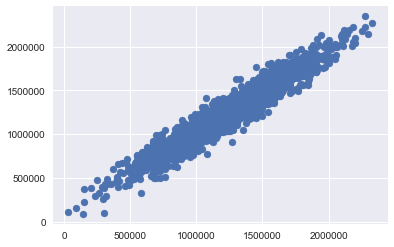

In [7]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

## Logistic regression

In [8]:
train = pd.read_csv('titanic_train.csv')

# Converting categorical features
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

train = pd.concat([train,sex,embark],axis=1)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [10]:
from sklearn.linear_model import LogisticRegression


# Train model
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'Q', 'S', 'male', 'Cabin'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
predictions = logmodel.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.89      0.77       154
          1       0.73      0.41      0.53       114

avg / total       0.70      0.69      0.66       268



# K Nearest Neighbours 

In [13]:
df = pd.read_csv("Classified Data",index_col=0)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.83      0.87       145
          1       0.86      0.92      0.89       155

avg / total       0.88      0.88      0.88       300



# Decision Tree and Random Forest

In [17]:
df = pd.read_csv('kyphosis.csv')

X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.72      0.76      0.74        17
    present       0.43      0.38      0.40         8

avg / total       0.63      0.64      0.63        25



In [20]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

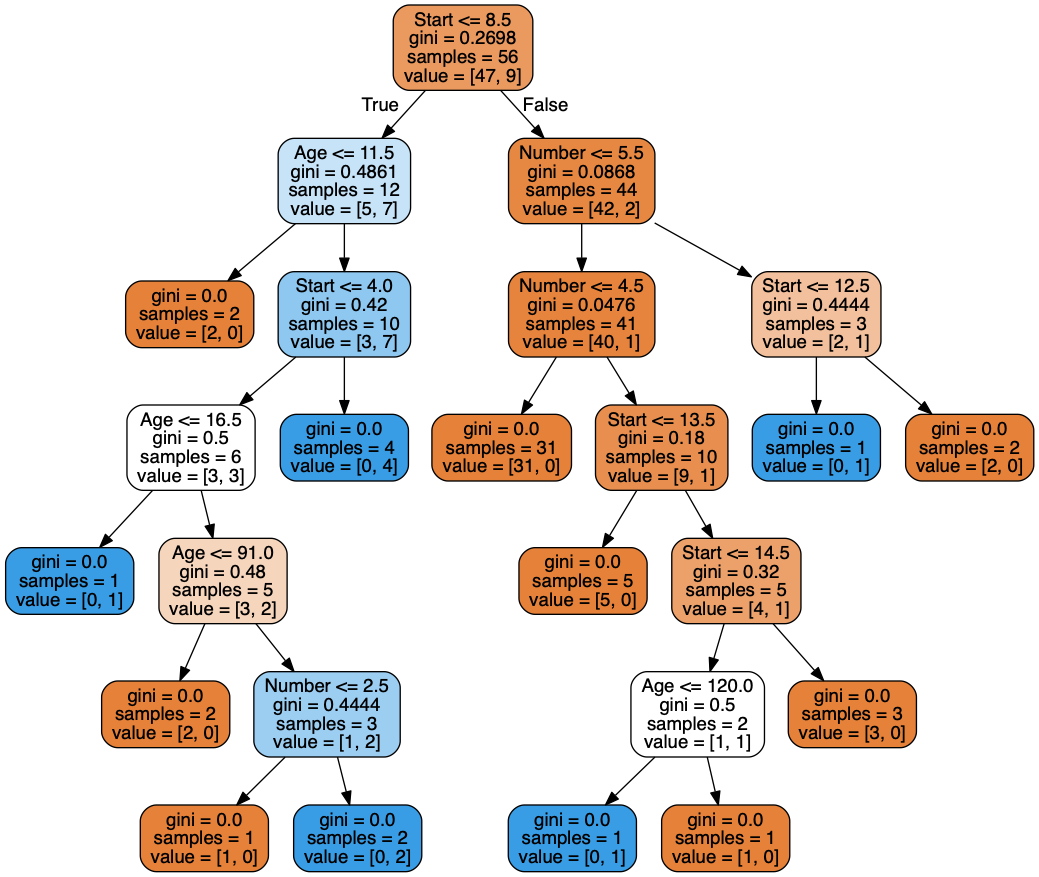

In [21]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
print(confusion_matrix(y_test,rfc_pred))

[[15  2]
 [ 5  3]]


In [29]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.75      0.88      0.81        17
    present       0.60      0.38      0.46         8

avg / total       0.70      0.72      0.70        25



# Support Vector Machines

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

cancer['target']

df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [38]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[  0  66]
 [  0 105]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Woah! Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [42]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ....... kernel=rbf, C=0.1, gamma=1, score=0.636364, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ..... kernel=rbf, C=0.1, gamma=0.1, score=0.636364, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .... kernel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... kernel=rbf, C=1, gamma=0.1, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.1 ......................................
[CV] ....... kernel=rbf, C=1, gamma=0.1, score=0.636364, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.631579, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.636364, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ..... kernel=rbf, C=1, gamma=0.001, score=0.902256, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ..... kernel=rbf, C=1, gamma=0.001, score=0.939850, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [43]:
print(grid.best_params_)
print(grid.best_estimator_)

{'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [47]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]
             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



# Kmeans

In [30]:
from sklearn.datasets import make_blobs
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

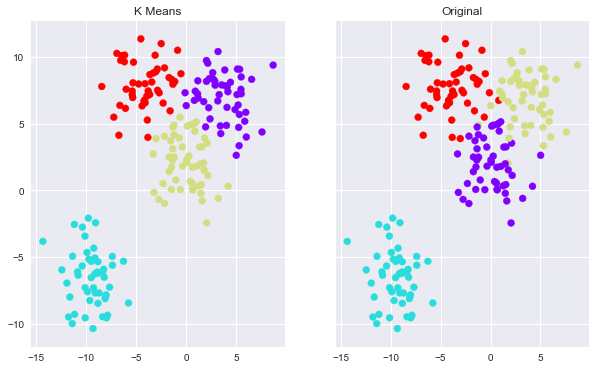

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

kmeans.cluster_centers_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# PCA

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [33]:
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

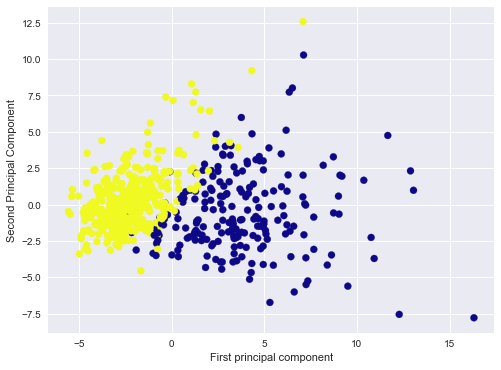

In [35]:
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Recommender systems

# Natural Language Processing

# Spark and Python

# Deep learning(tensor flow)

# SciPy